In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt 

## Let say

Let say, TWTR.csv is my realtime data (follow [realtime-evolution-strategy.ipynb](realtime-evolution-strategy.ipynb)), remember, we trained using `Close`, and `Volume` data.

So every request means new daily data.

You can improve the code to bind historical data with your own database or any websocket streaming data. Imagination is your limit now.

In [2]:
df = pd.read_csv('GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [3]:
# Load data
df = pd.read_csv('GOOGL.csv')
close = df['Close'].tolist()
volume = df['Volume'].tolist()


## Check balance

In [4]:
requests.get('http://localhost:8005/balance').json()

5993.54004

This is the initial capital we have for now, you can check [agent.ipynb](https://github.com/huseinzol05/Stock-Prediction-Models/blob/master/realtime-agent/agent.ipynb) how I defined it, or you can overwrite it.

## Trading

In [5]:
import json

data = json.dumps([close[0], volume[0]])
data

'[50.220219, 44659096]'

Remember, my last training session was only used `Close` and `Volume`, you need to edit it to accept any kind of parameters.

In [6]:
requests.get('http://localhost:8005/trade?data='+data).json()

{'action': 'fail',
 'balance': 5993.54004,
 'status': 'data not enough to trade',
 'timestamp': '2024-08-31 19:07:24.234091'}

Reason why you got 'data not enough to trade', because, the agent waiting another data to complete the queue, atleast same as `window_size` size.

Last time I defined `window_size` is 20, means, it only look back 20 historical data to trade.

Assume now, you have 100 times new datapoints going in, you want to trade these datapoints.

In [7]:
for i in range(200):
    data = json.dumps([close[i], volume[i]])
    requested = requests.get('http://localhost:8005/trade?data=' + data).json()
    print(requested)

{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:26.316700'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:28.362912'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:30.399595'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:32.435874'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:34.477018'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:36.531338'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:38.560555'}
{'action': 'fail', 'balance': 5993.54004, 'status': 'data not enough to trade', 'timestamp': '2024-08-31 19:07:40.598772'}
{'action': 'fail

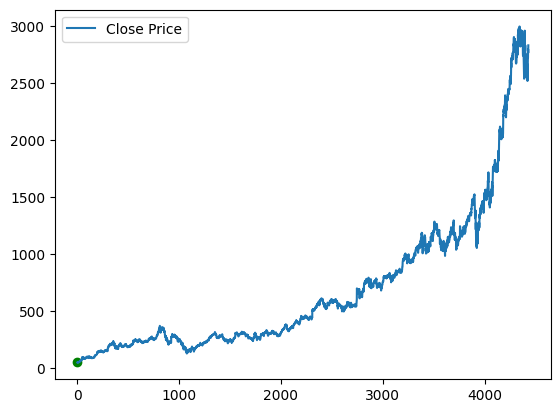

ConnectionError: HTTPConnectionPool(host='localhost', port=8005): Max retries exceeded with url: /trade?data=%5B286.651642,%204700095%5D (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000026FE44458B0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [8]:
# Initialize plot
plt.ion()
fig, ax = plt.subplots()
ax.plot(close, label='Close Price')
ax.legend()

# Loop through data and make trading decisions
for i in range(len(close)):
    # Prepare data for trading
    data = json.dumps([close[i], volume[i]])
    
    # Make trading decision
    requested = requests.get('http://localhost:8005/trade?data=' + data).json()
    
    # Update plot
    ax.scatter(i, close[i], color='r' if requested['action'] == 'buy' else 'g')  # Plot buy/sell points
    plt.pause(0.01)

plt.ioff()
plt.show()